input_shape = (227,227,3)
1.Convulated Layers
2. ReLU
3. Pooling Layer


In [1]:
from tensorflow.keras.layers import Conv2D  
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")

# what is SGD an optimizer?
# Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with 
#    suitable smoothness properties (e.g. differentiable or subdifferentiable).


# # Keras ImageDataGenerator is used for getting the input of the original data and further,
#     it makes the transformation of this data on a random basis and gives the output resultant containing 
 #     only the data that is newly transformed.It does not add the data.
    
# # Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent
#       procedure to update network weights iterative based in training data.Adam is an alternative optimization algorithm 
#       that provides more efficient neural network weights by running repeated cycles of “adaptive moment estimation.  


# # ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or
#     weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue 
#     the training from the state saved.

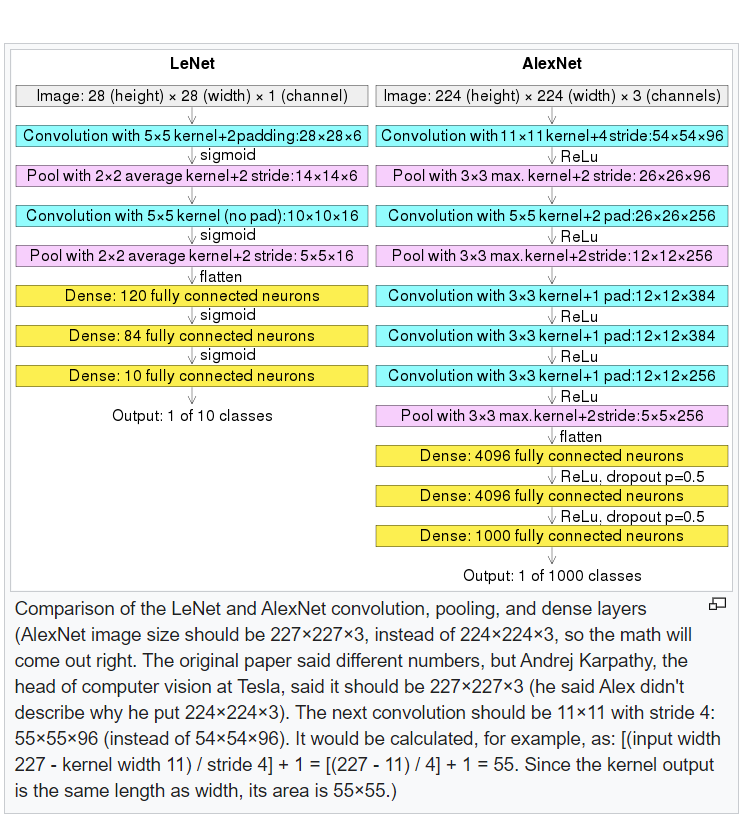]

In [2]:
model = Sequential()  

# 96 = neuron, 11 = kernel size, 
# Conv 01 Layer
model.add(Conv2D(96,11, padding = "valid",
          strides = (4,4),
          input_shape = (224,224,3),# image shape
         activation = "relu"))


model.add(MaxPooling2D(pool_size=(3, 3), 
                       strides = (2,2), 
                       padding='valid'))

model.add(BatchNormalization())


# Conv 02 Layer
model.add(Conv2D(256,5,
                 padding = "valid",
                 strides = (1,1),
                 activation = "relu"))


model.add(MaxPooling2D(pool_size=(3, 3), 
                       strides = (2,2), 
                       padding='valid'))

model.add(BatchNormalization())



# Conv 03 Layer
model.add(Conv2D(384,3,
                 padding = "valid",
                 strides = (1,1), # if there is no stride given then it will be (1,1)
                 activation = "relu"))
model.add(BatchNormalization())

# Conv 04 Layer
model.add(Conv2D(384,3,
                 padding = "valid",
                 strides = (1,1),
                 activation = "relu"))
model.add(BatchNormalization())


# Conv 05 Layer
model.add(Conv2D(256,3,
                 padding = "valid",
                 strides = (1,1),
                 activation = "relu"))


model.add(MaxPooling2D(pool_size=(3, 3), # kernel is never used in Maxpooling
                       strides = (2,2), 
                       padding='valid'))

model.add(BatchNormalization())


# Flatten Layer
model.add(Flatten())

# Dense 01

model.add(Dense(4096,activation = "relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())


# Dense 02

model.add(Dense(4096,activation = "relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Dense 03

model.add(Dense(1000,activation = "relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Final Layer
model.add(Dense(2, activation = 'softmax'))

#Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities,
#  where the probabilities of each value are proportional to the relative scale of each value in the vector.



2022-12-06 13:28:30.636793: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 384)         8

In [4]:
model.compile(optimizer= SGD(learning_rate= 0.001, momentum= 0.9, decay = 0.005),
             loss = 'categorical_crossentropy', # if terget veriable is more than two categorical crossentropy will be used.
             metrics=['accuracy']) # when we will use batchnorm, we will use sgd along with it.

# What is Binary Cross Entropy Or Logs Loss? Binary cross entropy compares each of the predicted probabilities to actual class output which can be either 0 or 1. 
 #    It then calculates the score that penalizes the probabilities based on the distance from the expected value. 
  #  That means how close or far from the actual value.

In [5]:
datasets_directory = "../input/usingalexnetinimage/dataset/"

In [6]:
datasets_directory

'../input/usingalexnetinimage/dataset/'

In [7]:
batch_size = 128

In [8]:
train_dataGenerator = ImageDataGenerator(rescale = 1./255,                # image scalling
                                        shear_range = 0.2,
                                        zoom_range = 0.2,
                                        width_shift_range = 0.2,
                                        fill_mode = 'nearest')


validation_dataGenerator = ImageDataGenerator(rescale = 1./255)

In [9]:
trainDatasets = train_dataGenerator.flow_from_directory(datasets_directory+"/training_set",
                                                       target_size = (224,224),
                                                       batch_size= batch_size,
                                                       class_mode = 'categorical')


validationDatasets = validation_dataGenerator.flow_from_directory(datasets_directory+"/test_set",
                                                       target_size = (224,224),
                                                       batch_size= batch_size,
                                                       class_mode = 'categorical')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [10]:
classInformation = trainDatasets.class_indices
print("Class information:{}". format(classInformation))

Class information:{'cats': 0, 'dogs': 1}


In [11]:
classInformation = trainDatasets.class_indices
print("Class information:{}". format(classInformation))
classes = list(classInformation)
print("Class Names:{}". format(classes))

Class information:{'cats': 0, 'dogs': 1}
Class Names:['cats', 'dogs']


In [12]:
classSampleT = trainDatasets.samples
print("Training Data Sample:{}". format(classSampleT))

classSampleV = validationDatasets.samples
print("Test data Sample:{}". format(classSampleV))

Training Data Sample:8000
Test data Sample:2000


In [13]:
weightPath = 'best_weight_9.hdf5'
checkPoint = ModelCheckpoint(weightPath, monitor = 'val_acc', verbose= 1, save_best_only = True, save_weight_only = True,mode = 'max')
callBackslist = [checkPoint]

In [15]:
history = model.fit(trainDatasets,
                   steps_per_epoch = classSampleT//batch_size,
                   validation_data = validationDatasets,
                   epochs = 20,
                   validation_steps = classSampleV//batch_size,
                   callbacks = callBackslist)

2022-12-06 13:28:42.516672: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
62/62 [==============================] - 375s 6s/step - loss: 0.9648 - accuracy: 0.5428 - val_loss: 0.7216 - val_accuracy: 0.4995
Epoch 2/20
62/62 [==============================] - 341s 5s/step - loss: 0.8405 - accuracy: 0.5746 - val_loss: 0.7406 - val_accuracy: 0.5010
Epoch 3/20
62/62 [==============================] - 342s 6s/step - loss: 0.7891 - accuracy: 0.5894 - val_loss: 0.6867 - val_accuracy: 0.5526
Epoch 4/20
62/62 [==============================] - 341s 5s/step - loss: 0.7497 - accuracy: 0.5945 - val_loss: 0.6697 - val_accuracy: 0.5828
Epoch 5/20
62/62 [==============================] - 342s 5s/step - loss: 0.7089 - accuracy: 0.6133 - val_loss: 0.6460 - val_accuracy: 0.6193
Epoch 6/20
62/62 [==============================] - 348s 6s/step - loss: 0.6898 - accuracy: 0.6326 - val_loss: 0.6177 - val_accuracy: 0.6583
Epoch 7/20
62/62 [==============================] - 345s 6s/step - loss: 0.6678 - accuracy: 0.6435 - val_loss: 0.6152 - val_accuracy: 0.6661
Epoch 8/20
62

When fitting a neural network for classification, Keras provide the following three different types of cross entropy loss function:

**binary_crossentropy**: Used as a loss function for binary classification model. The binary_crossentropy function computes the cross-entropy loss between true labels and predicted labels.
**categorical_crossentropy**: Used as a loss function for multi-class classification model where there are two or more output labels. The output label is assigned one-hot category encoding value in form of 0s and 1. The output label, if present in integer form, is converted into categorical encoding using keras.utils to_categorical method.
**sparse_categorical_crossentropy**: Used as a loss function for multi-class classification model where the output label is assigned integer value (0, 1, 2, 3…). This loss function is mathematically same as the categorical_crossentropy. It just has a different interface.
Here is how the loss function is set as one of the above in order to configure neural network. Pay attention to the parameter, loss, which is assigned the value of binary_crossentropy for learning parameters of the binary classification neural network model.


network.compile(optimizer=optimizers.RMSprop(lr=0.01),
                loss='binary_crossentropy',
                metrics=['accuracy'])
When loss function to be used is categorical_crossentropy, the Keras network configuration code would look like the following:

network.compile(optimizer=optimizers.RMSprop(lr=0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])